In [16]:
import os 
from datetime import datetime ,timedelta

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline


In [17]:
TICKER = 'AAPL'
YEARS = 2


In [18]:
end_date = datetime.today()
start_date = end_date - timedelta(days =365 * YEARS)
df = yf.Ticker(TICKER).history(start=start_date,end=end_date)

df.head() , df.tail()


(                                 Open        High         Low       Close  \
 Date                                                                        
 2023-07-07 00:00:00-04:00  189.512554  190.760058  188.354154  188.789780   
 2023-07-10 00:00:00-04:00  187.383861  188.106636  185.185867  186.740311   
 2023-07-11 00:00:00-04:00  187.284872  187.423484  184.750252  186.215576   
 2023-07-12 00:00:00-04:00  187.799690  189.799670  186.601693  187.888809   
 2023-07-13 00:00:00-04:00  188.611572  189.294734  187.898708  188.651169   
 
                              Volume  Dividends  Stock Splits  
 Date                                                          
 2023-07-07 00:00:00-04:00  46778000        0.0           0.0  
 2023-07-10 00:00:00-04:00  59922200        0.0           0.0  
 2023-07-11 00:00:00-04:00  46638100        0.0           0.0  
 2023-07-12 00:00:00-04:00  60750200        0.0           0.0  
 2023-07-13 00:00:00-04:00  41342300        0.0           0.0  ,
   

In [19]:
prices = df['Close'].dropna()
log_returns = np.log(prices/prices.shift(1)).dropna()
print(f"Skewness: {log_returns.skew():.3f}")
print(f"Kurtosis: {log_returns.kurtosis():.3f}")


Skewness: 0.516
Kurtosis: 12.288


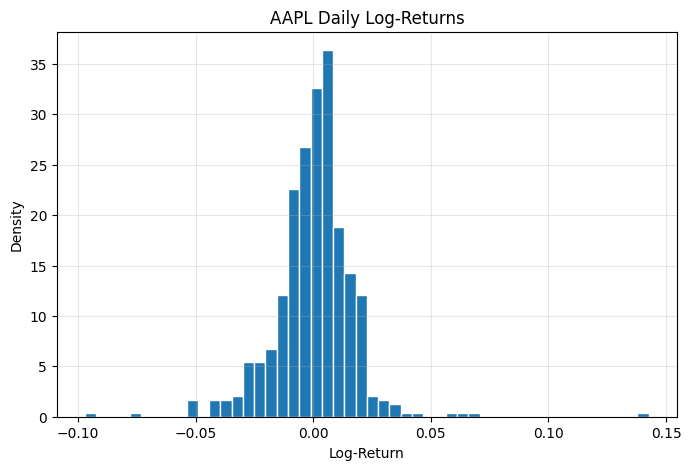

In [20]:
plt.figure(figsize=(8,5))
plt.hist(log_returns, bins=50, density=True, edgecolor='w')
plt.title(f"{TICKER} Daily Log-Returns")
plt.xlabel("Log-Return")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()


In [21]:
os.makedirs('data', exist_ok=True)

out = pd.DataFrame({
    'Adj Close': prices,
    'LogReturn': log_returns
})
out.to_csv('data/real_prices.csv', index_label='Date')
print("✓ Saved → data/real_prices.csv")

✓ Saved → data/real_prices.csv
